In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats

In [38]:
N = 2;  M = 3;  ntime = 20
x = np.zeros([N, ntime])
y = np.zeros([M, ntime])
T = np.array([[0.7, 0.4], 
              [0.3, 0.6]])
E = np.array([[0.1, 0.6], 
              [0.4, 0.3], 
              [0.5, 0.1]])

x[:, 0] = [0.57142857, 0.42857143]
y[:, 0:1] = np.dot(E, x[:,0:1])
for i in range(1,ntime):
    x[:, i:i+1] = np.dot(T, x[:, i-1:i])
    y[:, i:i+1] = np.dot(E, x[:, i:i+1])
        
print(x.T)
print(y.T)

[[0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]]
[[0.31428571 0.35714286 0.32857143]
 [0.31428571 0.35714286 0.32857143]
 [0.31428571 0.35714286 0.32857143]
 [0.31428571 0.35714286 0.32857143]
 [0.31428571 0.35714286 0.32857143]
 [0.31428571 0.35714286 0.32857143]
 [0.31428571 0.35714286 0.32857143]
 [0.31428571 0.35714286 0.32857143]
 [0.31428571 0.35714286 0.32857143]
 [0.31428571 0.35714286 0.32857143]
 [0.31428571 0.35714286 0.32857143]
 [0.31428571 0.35714286 0.32857143]
 [0.31428571 0.35714286 0.32857143]
 [0.31428571 0.35714286 0.32857

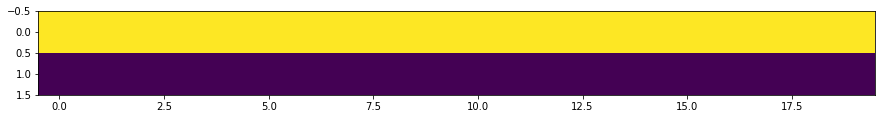

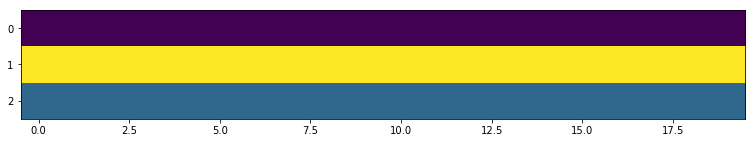

In [40]:
plt.figure(1, figsize=(15, 2))
plt.imshow(x)
plt.figure(2, figsize=(15, 2))
plt.imshow(y)


In [106]:
def simulation(T, E, ntime=100, x0=0):
    M, N = E.shape
    x = np.zeros([ntime]).astype(int)
    y = np.zeros([ntime]).astype(int)
    x[0] = x0
    y[0] = np.random.choice(range(M), p=E[:,x[0]])
    for i in range(1,ntime):
        x[i] = np.random.choice(range(N), size=1, replace=True, p=T[:,x[i-1]])
        y[i] = np.random.choice(range(M), size=1, replace=True, p=E[:,x[i]])
    return x, y

def pdf_category(x, n):
    p = np.zeros([n])
    for i in range(n):
        p[i] = sum(x==i)/len(x)
    return p

def condpdf_MC(x, n):
    p = np.zeros([n, n])
    for i in range(n):
        flag = list(x[1:] == i)
        flag.append(False)
        for j in range(n):
            p[i,j] = sum(x[flag]==j)
    p = p / np.sum(p, axis=0).reshape([1, n])
    return p

def condpdf_emission(x, n, y, m):
    p = np.zeros([m, n])
    for i in range(m):
        flag = (y == i)
        for j in range(n):
            p[i,j] = sum(x[flag]==j)
    p = p / np.sum(p, axis=0).reshape([1, n])
    return p

x, y = simulation(T, E, ntime=10000)

print(pdf_category(x, 2))
print(pdf_category(y, 3))
print(condpdf_MC(x, 2))
print(condpdf_emission(x, 2, y, 3))


[0.5704 0.4296]
[0.3059 0.365  0.3291]
[[0.70196353 0.39557625]
 [0.29803647 0.60442375]]
[[0.09431978 0.58682495]
 [0.40515428 0.31168529]
 [0.50052595 0.10148976]]


In [109]:

n = 2
xguess = np.random.choice(range(n), size=len(y), replace=True, p=[0.5, 0.5])
for k in range(1):
    Tk = condpdf_MC(xguess, n)
    Ek = condpdf_emission(xguess, n, y, 3)
    print(Tk)
    print(Ek)



[[0.49201859 0.49782178]
 [0.50798141 0.50217822]]
[[0.30369772 0.30805781]
 [0.36370984 0.36626411]
 [0.33259244 0.32567808]]


In [39]:
# steady state of Markov chain
def steadystate(T):
    n = T.shape[0]
    tmp = np.append(T[:n-1,:]-np.identity(n)[:n-1,:], np.zeros([1,n])+1, axis=0)
    print(tmp)
    x = np.linalg.solve(tmp, np.append(np.zeros([n-1]), 1) )
    u, s, v = np.linalg.svd(T)
    print(u)
    print(u/np.sum(u,axis=1))
    return x

T = np.array([[0.7, 0.4], 
              [0.3, 0.6]])

steadystate(T)


[[-0.3  0.4]
 [ 1.   1. ]]
[[-0.78004181 -0.62572739]
 [-0.62572739  0.78004181]]
[[ 0.55488611 -4.05488611]
 [ 0.44511389  5.05488611]]


array([0.57142857, 0.42857143])